In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model #linear model from sklearn
from sklearn.metrics import r2_score # evaluation
import seaborn as sns # plotting
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# load truck csv file
path = 'trucks.csv'
df = pd.read_csv(path)
df.head()

,list_price,best_price
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


In [3]:
#information about data truck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   list_price  23 non-null     float64
 1   best_price  23 non-null     float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [4]:
df["list_price"].value_counts()


12.400000    1
22.400000    1
19.700001    1
19.500000    1
17.400000    1
19.200001    1
18.400000    1
17.299999    1
16.700001    1
15.500000    1
19.400000    1
20.299999    1
14.300000    1
18.799999    1
17.900000    1
17.000000    1
15.400000    1
16.500000    1
16.900000    1
16.100000    1
14.900000    1
14.500000    1
21.200001    1
Name: list_price, dtype: int64

In [5]:
df["best_price"].value_counts()

11.200000    1
19.600000    1
17.200001    1
17.000000    1
15.200000    1
16.799999    1
16.100000    1
15.100000    1
14.600000    1
14.000000    1
16.900000    1
17.700001    1
12.500000    1
16.400000    1
15.600000    1
14.900000    1
13.400000    1
14.400000    1
14.800000    1
14.100000    1
13.100000    1
12.700000    1
18.600000    1
Name: best_price, dtype: int64

In [6]:
df.describe()

,list_price,best_price
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


array([[<AxesSubplot:title={'center':'best_price'}>]], dtype=object)

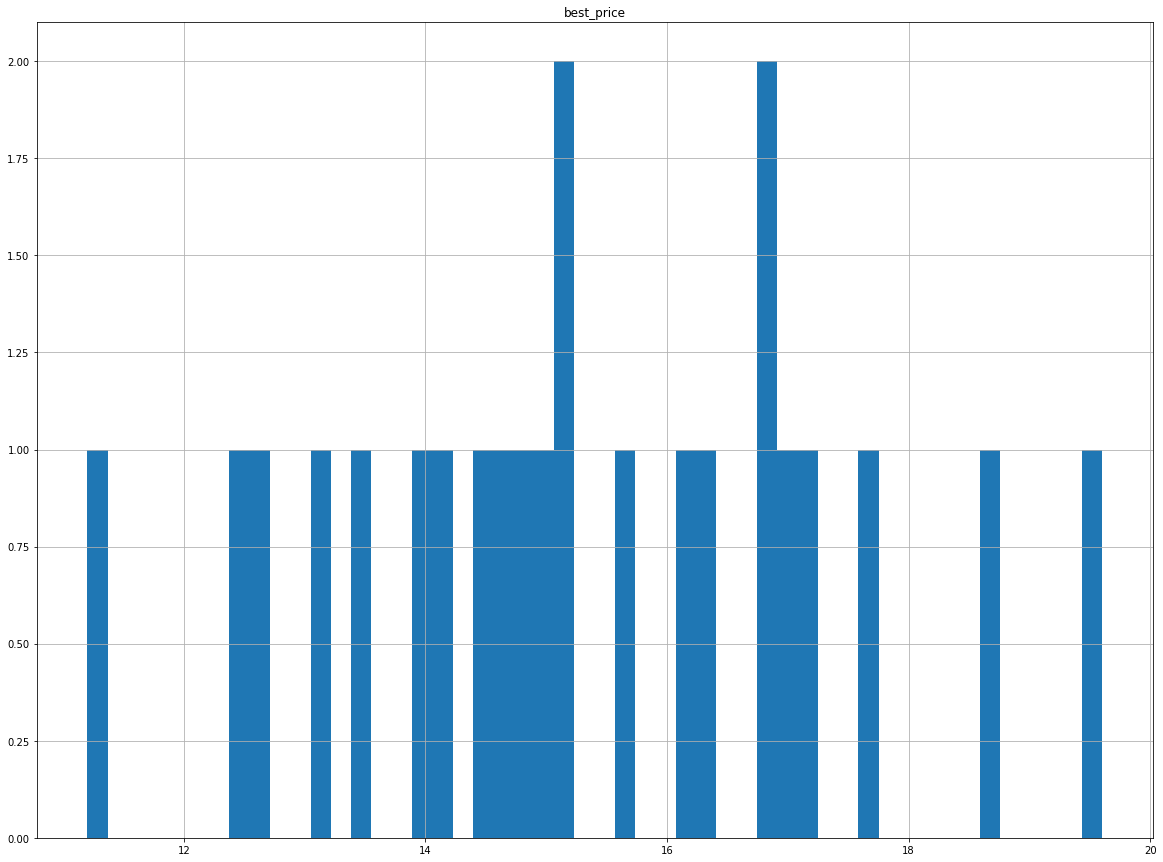

In [7]:
# plot histogram for best price and list price
df.hist("best_price", bins=50, figsize=(20,15)) 


array([[<AxesSubplot:title={'center':'list_price'}>]], dtype=object)

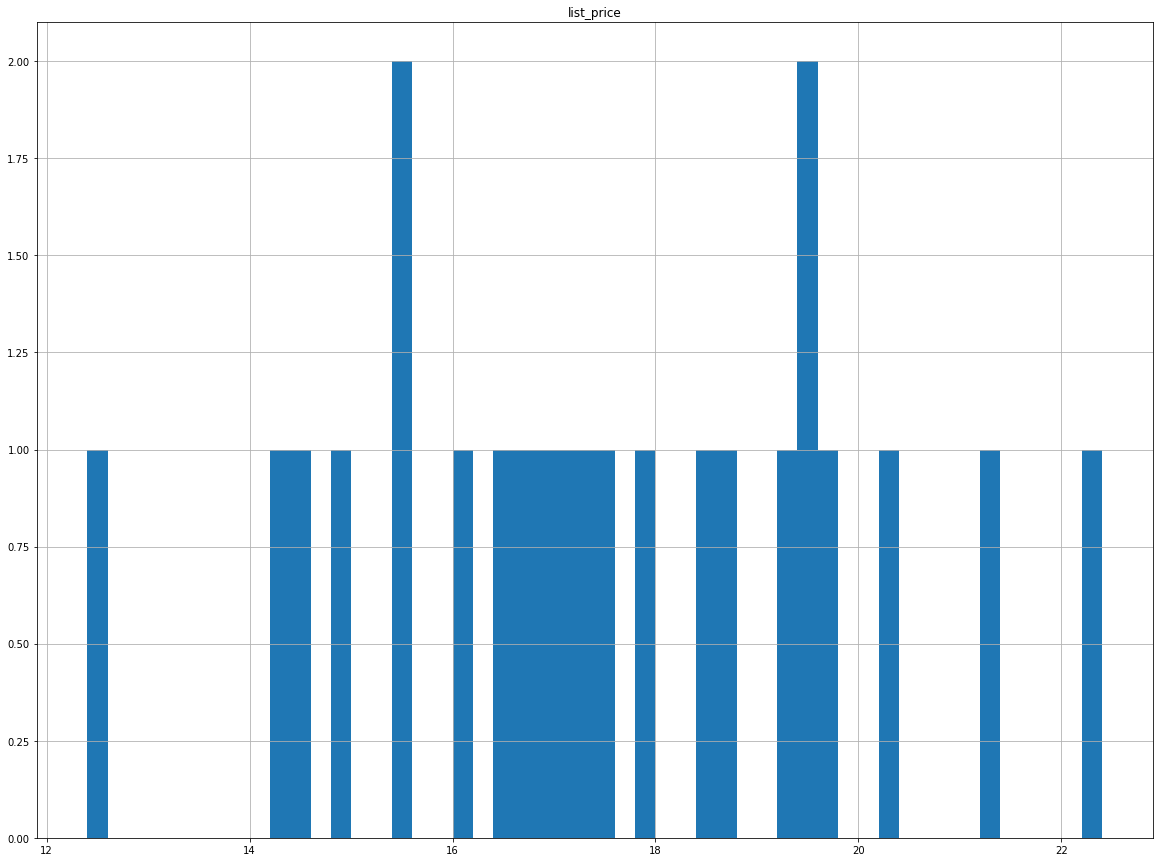

In [8]:
df.hist("list_price", bins=50, figsize=(20,15)) 

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.head(5)
train_set.describe()
 

,list_price,best_price
count,18.000000,18.000000
mean,17.738889,15.527778
std,2.417130,2.086598
min,14.300000,12.500000
25%,15.650000,14.025000
50%,17.349999,15.150000
75%,19.475000,16.975000
max,22.400000,19.600000


In [10]:
len(test_set) 

5

In [11]:
len(train_set) 

18

In [12]:
df_train_set = train_set.copy() 

<AxesSubplot:xlabel='list_price', ylabel='best_price'>

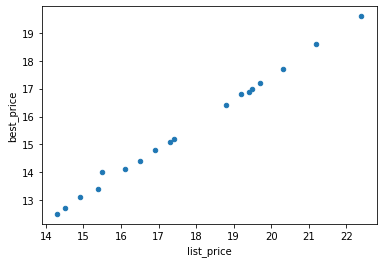

In [13]:
# plot scatter for train set coppy
df_train_set.plot(kind="scatter", x="list_price", y = "best_price") 


In [14]:
# get coef for train set
corr_matrix = df_train_set.corr()
corr_matrix


,list_price,best_price
list_price,1.000000,0.998598
best_price,0.998598,1.000000


In [63]:
x=np.array(df_train_set["list_price"]).reshape(-1,1)
y=np.array(df_train_set["best_price"]).reshape(-1,1)


# linear regression

In [31]:
## Create the linear regression object and fit the model
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [24]:
some_x = x[:5]
some_y = y[:5]

In [25]:
print("prediction: ", lm.predict(some_x))
print("Labels: ", list(some_y))


prediction:  [19.5458583  12.56330613 16.95972768 14.80461884 12.73571467]
Labels:  [19.60000038, 12.5, 16.89999962, 14.80000019, 12.69999981]


In [26]:
## evaluate linear regression by rmse
from sklearn.metrics import mean_squared_error
df_predictions = lm.predict(x)
lin_mse = mean_squared_error(y, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.1073589791541927

In [34]:
## evaluate linear regression by R-Squared
Y_Pred = lm.predict(x)
print("R-Squared:", lm.score(y, Y_Pred))

R-Squared: 0.09285677992042518


# DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)


DecisionTreeRegressor()

In [36]:
# evaluate DecisionTreeRegressor by rmse
df_predictions = tree_reg.predict(x)
tree_mse = mean_squared_error(y, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [38]:
# evaluate DecisionTreeRegressor by R-Squared
Y_Pred = tree_reg.predict(x)
print("R-Squared:", tree_reg.score(y, Y_Pred))

R-Squared: 0.19922842437844823


#  RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x, y)

RandomForestRegressor()

In [40]:
## evaluate random forest by rmse
df_predictions = forest_reg.predict(x)
forest_mse = mean_squared_error(y, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.1371837991566425

In [58]:
# evaluate random forest by R-Squared
Y_Pred = forest_reg.predict(x)
print("R-Squared:", forest_reg.score(y, Y_Pred))

R-Squared: 0.21662224971420185


In [59]:
#  cross-validation on Decision Tree Model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([0.72111023, 0.29154805, 0.38078861, 0.29154805, 0.22360637,
       0.15811418, 0.76485285, 0.50990203, 0.09999943, 0.29999924])

In [60]:
def display_score(scores):
    print("Scores: ", scores)  # array of k scores
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())


#call the function 
display_score(tree_rmse_scores)

Scores:  [0.72111023 0.29154805 0.38078861 0.29154805 0.22360637 0.15811418
 0.76485285 0.50990203 0.09999943 0.29999924]
Mean:  0.3741469040720243
Standard deviation:  0.2133402668826734


In [61]:
#cross_validation on Linear Regression Model
lin_scores = cross_val_score(lm, x, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_score(lin_rmse_scores)


Scores:  [0.0876678  0.04665421 0.04023699 0.03880734 0.01460068 0.04124773
 0.12044236 0.31812516 0.03778357 0.06437318]
Mean:  0.08099390248245202
Standard deviation:  0.08401380939173904


In [64]:
#cross_validation on  random forest  Model
lin_scores = cross_val_score(forest_reg, x, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_score(lin_rmse_scores)

Scores:  [0.97007877 0.1459472  0.37394205 0.16584675 0.10112359 0.19780489
 0.40360941 0.53456383 0.24299956 0.05499929]
Mean:  0.3190915325915965
Standard deviation:  0.2591491163051635


In [49]:
x_text = np.array(test_set["list_price"]).reshape(-1,1)
y_test = np.array(test_set["best_price"])

In [50]:
lm = LinearRegression()
final_model = lm.fit(x,y)

In [51]:
final_predictions = final_model.predict(x_text)
lin_mse = mean_squared_error(y_test, final_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.12725045375025773

In [52]:
# evaluation  on  cross- validation 
final_scores = cross_val_score(final_model, x_text, y_test, scoring="neg_mean_squared_error", cv=5)
final_rmse_scores = np.sqrt(-final_scores)
display_score(final_rmse_scores)

Scores:  [0.07254283 0.03955767 0.28710036 0.00056053 0.10606372]
Mean:  0.10116502128406565
Standard deviation:  0.09932965803192685
